# Kernel Adaptive Subspace Detector (KASD) for Hyperspectral Imagery

#### 

<a href="#section1">1. Toy/Synthetic Data</a><br>
<a href="#section1.1" style="margin-left:20px">1.1. Sample Parameters </a><br>
<a href="#section1.2" style="margin-left:20px">1.2. Toy Dataset (A) - Gaussian Mixture </a><br>
<a href="#section1.3" style="margin-left:20px">1.3. Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture </a><br>
<a href="#section1.4" style="margin-left:20px">1.4. Plot - Toy Dataset A & B</a><br>

<a href="#section2">2. ASD - On Toy/Synthetic Data</a><br>
<a href="#section2.1" style="margin-left:20px">2.1. Toy Dataset (A) - Gaussian Mixture </a><br>
<a href="#section2.2" style="margin-left:20px">2.2. Toy Dataset (B) - Nonlinearly mapped </a><br>
<a href="#section2.3" style="margin-left:20px">2.3. Save Combined Plots - ASD (Decision Boundaries & Contour Plots)</a><br>

<a href="#section3">3. KASD (Gaussian RBF Kernel) - On Toy/Synthetic Data</a><br>
<a href="#section3.1" style="margin-left:20px">3.1. Toy Dataset (A) - Gaussian Mixture </a><br>
<a href="#section3.2" style="margin-left:20px">3.2. Toy Dataset (B) - Nonlinearly mapped </a><br>
<a href="#section3.3" style="margin-left:20px">3.3. Save Combined Plots - KASD (Gaussian RBF Kernel) (Decision Boundaries & Contour Plots)</a><br>

<a href="#section4">4. Real Data (Hyperspectral Image) - Oil Spill</a><br>
<a href="#section4.1" style="margin-left:20px">4.1. HSI Image Pre-processing</a><br>
<a href="#section4.2" style="margin-left:20px">4.2. Full Image Visualization - RGB Channels (26159x796) </a><br>
<a href="#section4.3" style="margin-left:20px">4.3. ROI Visualization - RGB Channels (276X85) </a><br>
<a href="#section4.4" style="margin-left:20px">4.4. ROI Ground Truth - RGB Channels (276X85) </a><br>


<a href="#section5">5. ASD & KASD on ROI </a><br>
<a href="#section5.1" style="margin-left:20px">5.1. ASD </a><br>
<a href="#section5.2" style="margin-left:20px">5.2. KASD (Gaussian RBF Kernel) </a><br>
<a href="#section5.3" style="margin-left:20px">5.3. KASD (Gaussian Polynomial Kernel) </a><br>
<a href="#section5.4" style="margin-left:20px">5.4. KASD (Gaussian Spectral Angle Kernel) </a><br>


<a href="#section6">6. ROC curve </a><br>

In [3]:
import pickle as pkl
import numpy as np
import random
import sympy

import spectral.io.envi as envi
from spectral import *

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal

from PIL import Image
from sklearn.metrics import roc_curve

from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

<a id="section1"></a>
# 1.  Toy/Synthetic Data

<a id="section1.1"></a>
## 1.1  Toy Dataset - Sample Parameters

In [2]:
# define the number of samples to be drawn for target & background
n_samples = [100,200] # 100 (target), 200 (background)

# mean & covariance matrix of target & background
t_means = [[0, 3], [.5, 1]]
t_covs = [[[1,0],[0,.1]], [[.7,.5],[.5,.5]]]

# # another alternate set of mean & covariance which can be tried out
# t_means = [[0,2], [0, 0]]
# t_covs = [[[.56,.4],[.4,.4]], [[.7,.5],[.5,.5]]]

<a id="section1.2"></a>
## 1.2  Toy Data (A) - Gaussian Mixture

In [3]:
##### Start Toy Dataset (A) - Gaussian Mixture #####
X = []
for i in range(len(t_means)):
    x = np.random.multivariate_normal(t_means[i], t_covs[i], n_samples[i])
    X += list(x)
X = np.array(X)
print("Toy Dataset A (Gaussian Mixture) shape:", X.shape)

# mesh grid for toy data (a) - to be used later for contour plotting
h = .2 # step resolution for x/y axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx_A, yy_A = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print("Mesh Grid Shape - Gaussian Mixture (xx):", xx_A.shape)
print("Mesh Grid Shape - Gaussian Mixture (yy)", yy_A.shape)
##### End Toy Dataset (A) - Gaussian Mixture #####

Toy Dataset A (Gaussian Mixture) shape: (300, 2)
Mesh Grid Shape - Gaussian Mixture (xx): (34, 42)
Mesh Grid Shape - Gaussian Mixture (yy) (34, 42)


<a id="section1.3"></a>
## 1.3  Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture

In [4]:
##### Start Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture #####
Y = []
for i in range(X.shape[0]):
    # (x,y) => (x, x^2+y) given in subsec A of Sec V of paper on experimental results
    Y.append([X[i,0], X[i,0]**2 + X[i,1]]) 
Y = np.array(Y)
print("Toy Dataset B (Nonlinearly Mapped Version Of Gaussian Mixture) shape:", Y.shape)

# mesh grid for toy data (B) - to be used later for contour plotting
h = .2 # step resolution for x/y axis
x_min, x_max = Y[:, 0].min() - 1, Y[:, 0].max() + 1
y_min, y_max = Y[:, 1].min() - 1, Y[:, 1].max() + 1
xx_B, yy_B = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print("Mesh Grid Shape - Nonlinearly Mapped Version Of Gaussian Mixture (xx):", xx_B.shape)
print("Mesh Grid Shape - Nonlinearly Mapped Version Of Gaussian Mixture (yy)", yy_B.shape)
##### End Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture #####

Toy Dataset B (Nonlinearly Mapped Version Of Gaussian Mixture) shape: (300, 2)
Mesh Grid Shape - Nonlinearly Mapped Version Of Gaussian Mixture (xx): (93, 42)
Mesh Grid Shape - Nonlinearly Mapped Version Of Gaussian Mixture (yy) (93, 42)


<a id="section1.4"></a>
## 1.4 Plots - Toy Dataset A & B

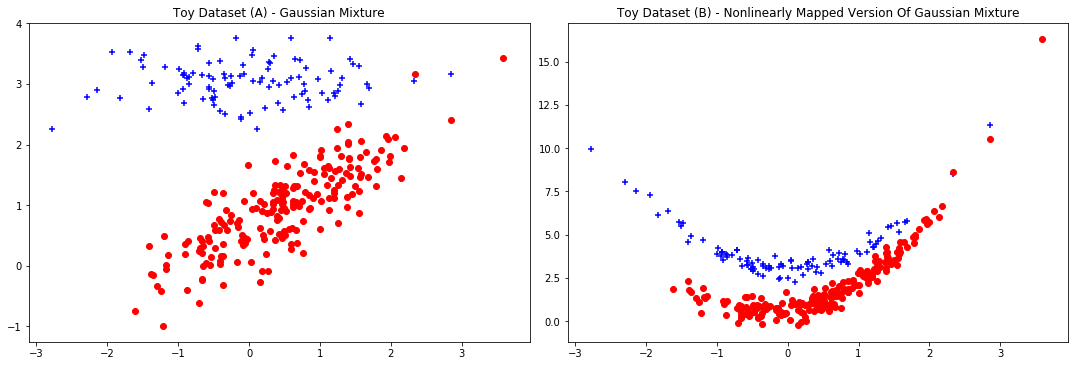

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(X[:n_samples[0], 0], X[:n_samples[0], 1],color = "blue", marker= '+')
plt.scatter(X[n_samples[0]:, 0], X[n_samples[0]:, 1], color = "red", marker= 'o')
plt.title("Toy Dataset (A) - Gaussian Mixture")

plt.subplot(122)
plt.scatter(Y[:n_samples[0], 0], Y[:n_samples[0], 1],color = "blue", marker= '+')
plt.scatter(Y[n_samples[0]:, 0], Y[n_samples[0]:, 1], color = "red", marker= 'o')
plt.title("Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("./pics/ToyDatasets.png")

<a id="section2"></a>
# 2.  ASD

<a id="section2.1"></a>
## 2.1.  ASD on Toy Dataset (A) - Gaussian Mixture

(34, 42)
Toy Dataset (A) - accuracy: 0.81, precision:0.68, recall:0.73, f1:0.73


([], <a list of 0 Text yticklabel objects>)

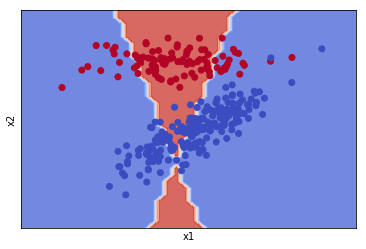

In [19]:
CLASS_LABELS = [1]*n_samples[0] + [0]*n_samples[1]
CLASS_LABELS = np.array(CLASS_LABELS)

# target samples of Toy Dataset (A) - Gaussian Mixture
target         = X[:n_samples[0], :]

# QR Decomposition (Q.T is denoted a U in eqn 1 of paper)
Q, _ = np.linalg.qr(target)
U = Q.T

# Covariance natrix (here we know it exactly since we generated the data. If unknown then we'd estimate it)
C = np.array(t_covs[0])
C_Inv = np.linalg.inv(C)

# this matrix (U^T * C^-1 * U) is used many times in ASD function below so creating a variable for it
mat = np.matmul(np.matmul(U.T, C_Inv), U)


ETA_THRESHOLD = 99 # needed for threshold condition of eqn 2
def ASD(x, threshold):
    # eqn 2 of paper
    numerator = np.matmul(x.T, C_Inv)
    numerator = np.matmul(numerator,U)
    numerator = np.matmul(numerator, mat)
    numerator = np.matmul(numerator, U.T)
    numerator = np.matmul(numerator, C_Inv)
    numerator = np.matmul(numerator, x)
    
    denominator = np.matmul(x.T, C_Inv)
    denominator = np.matmul(denominator, x)

    ratio = numerator/denominator # equation 2 of paper    
#     print(ratio[0][0])
    
    if ratio[0][0]<=threshold: # threshold condition for eqn 2 of paper
        return 0 # background
    else:
        return 1 # target

# Generating predictions for mesh grid for contour plot
ASD_predictions_A = [] 
for i in range(xx_A.shape[0]*xx_A.shape[1]):
    x, y = xx_A.ravel()[i], yy_A.ravel()[i]
    label = ASD(np.array([x, y]).reshape(-1,1), threshold=ETA_THRESHOLD)
    ASD_predictions_A.append(label)
ASD_predictions_A = np.array(ASD_predictions_A).reshape(xx_A.shape)
print(ASD_predictions_A.shape)

# Generating predictions for various accuracy metrics for Toy Dataset (A)
preds = []
for i in range(X.shape[0]):
    label = ASD(X[i,:].reshape(-1,1), threshold=ETA_THRESHOLD)
    preds.append(label)
preds = np.array(preds)

ASD_accuracy_A = accuracy_score(preds, CLASS_LABELS)
ASD_precision_A = precision_score(preds, CLASS_LABELS)
ASD_recall_A = recall_score(preds, CLASS_LABELS)
ASD_f1_A = f1_score(preds, CLASS_LABELS)
print("Toy Dataset (A) - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(ASD_accuracy_A, ASD_precision_A, ASD_recall_A, ASD_recall_A))


# Toy Dataset (A) - Gaussian Mixture
plt.contourf(xx_A, yy_A, ASD_predictions_A, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(X[:,0], X[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_A.min(), xx_A.max())
plt.ylim(yy_A.min(), yy_A.max())
plt.xticks(())
plt.yticks(())

<a id="section2.2"></a>
## 2.2.  ASD on Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture

(93, 42)
Toy Dataset (B) - accuracy: 0.88, precision:1.00, recall:0.73, f1:0.73


([], <a list of 0 Text yticklabel objects>)

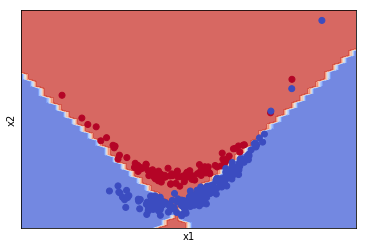

In [20]:
CLASS_LABELS = [1]*n_samples[0] + [0]*n_samples[1]
CLASS_LABELS = np.array(CLASS_LABELS)

# target samples of Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture
target         = Y[:n_samples[0], :]

# QR Decomposition (Q.T is denoted a U in eqn 1 of paper)
Q, _ = np.linalg.qr(target)
U = Q.T

# Covariance natrix (here we know it exactly since we generated the data. If unknown then we'd estimate it)
C = np.array(t_covs[0])
C_Inv = np.linalg.inv(C)

# this matrix (U^T * C^-1 * U) is used many times in ASD function below so creating a variable for it
mat = np.matmul(np.matmul(U.T, C_Inv), U)


ETA_THRESHOLD = 99 # needed for threshold condition of eqn 2
def ASD(x, threshold):
    # eqn 2 of paper
    numerator = np.matmul(x.T, C_Inv)
    numerator = np.matmul(numerator,U)
    numerator = np.matmul(numerator, mat)
    numerator = np.matmul(numerator, U.T)
    numerator = np.matmul(numerator, C_Inv)
    numerator = np.matmul(numerator, x)
    
    denominator = np.matmul(x.T, C_Inv)
    denominator = np.matmul(denominator, x)

    ratio = numerator/denominator # equation 2 of paper    
#     print(ratio[0][0])
    
    if ratio[0][0]<=threshold: # threshold condition for eqn 2 of paper
        return 0 # background
    else:
        return 1 # target

# Generating predictions for mesh grid for contour plot
ASD_predictions_B = [] 
for i in range(xx_B.shape[0]*xx_B.shape[1]):
    x, y = xx_B.ravel()[i], yy_B.ravel()[i]
    label = ASD(np.array([x, y]).reshape(-1,1), threshold=ETA_THRESHOLD)
    ASD_predictions_B.append(label)
ASD_predictions_B = np.array(ASD_predictions_B).reshape(xx_B.shape)
print(ASD_predictions_B.shape)

# Generating predictions for various accuracy metrics for Toy Dataset (B)
preds = []
for i in range(Y.shape[0]):
    label = ASD(Y[i,:].reshape(-1,1), threshold=ETA_THRESHOLD)
    preds.append(label)
preds = np.array(preds)

ASD_accuracy_B = accuracy_score(preds, CLASS_LABELS)
ASD_precision_B = precision_score(preds, CLASS_LABELS)
ASD_recall_B = recall_score(preds, CLASS_LABELS)
ASD_f1_B = f1_score(preds, CLASS_LABELS)
print("Toy Dataset (B) - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(ASD_accuracy_B, ASD_precision_B, ASD_recall_B, ASD_recall_B))


plt.contourf(xx_B, yy_B, ASD_predictions_B, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(Y[:,0], Y[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_B.min(), xx_B.max())
plt.ylim(yy_B.min(), yy_B.max())
plt.xticks(())
plt.yticks(())

<a id="section2.3"></a>
## 2.3.  Save Combined Plots - ASD (Decision Boundaries & Contour Plots)

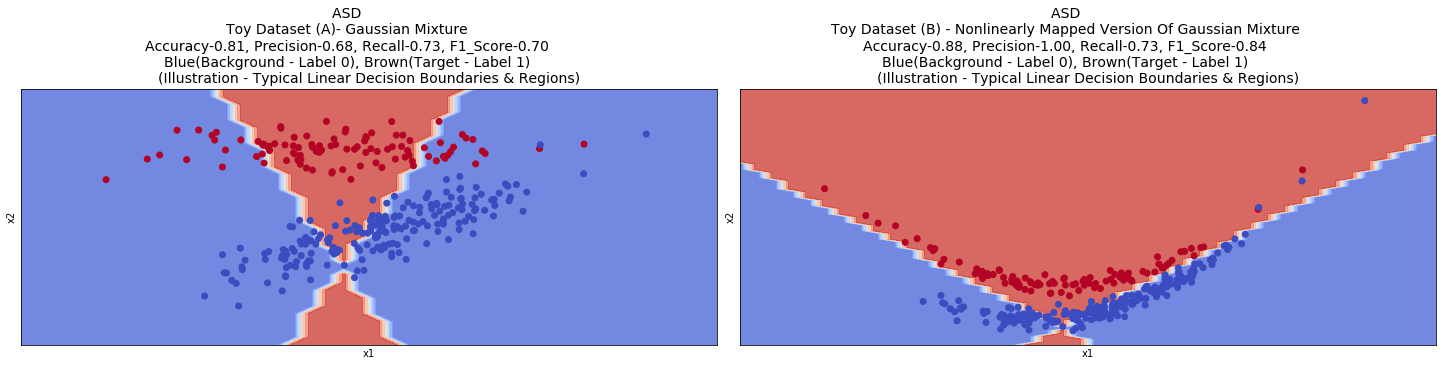

In [8]:
plt.figure(figsize=(20,5))

# Toy Dataset (A) - Gaussian Mixture
plt.subplot(121)
plt.contourf(xx_A, yy_A, ASD_predictions_A, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(X[:,0], X[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_A.min(), xx_A.max())
plt.ylim(yy_A.min(), yy_A.max())
plt.xticks(())
plt.yticks(())
plt.title("ASD\
          \nToy Dataset (A)- Gaussian Mixture\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}\
          \nBlue(Background - Label 0), Brown(Target - Label 1)\
          \n(Illustration - Typical Linear Decision Boundaries & Regions)"\
          .format(ASD_accuracy_A, ASD_precision_A, ASD_recall_A, ASD_f1_A), size=14)

# Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture
plt.subplot(122)
plt.contourf(xx_B, yy_B, ASD_predictions_B, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(Y[:,0], Y[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_B.min(), xx_B.max())
plt.ylim(yy_B.min(), yy_B.max())
plt.xticks(())
plt.yticks(())
plt.title("ASD\
          \nToy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}\
          \nBlue(Background - Label 0), Brown(Target - Label 1)\
          \n(Illustration - Typical Linear Decision Boundaries & Regions)"\
          .format(ASD_accuracy_B, ASD_precision_B, ASD_recall_B, ASD_f1_B), size=14)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("./pics/ASD_ToyDatasets.png")

<a id="section3"></a>
# 3.  KASD (Gaussian RBF Kernel)

#### the best value of c, ETA_THRESHOLD & CENTER_DATA (in sec 3.1, 3.2 below) will vary from case to case based on data & needs to be found for each case separately with experimentation

<a id="section3.1"></a>
## 3.1.  KASD (Gaussian RBF Kernel) on Toy Dataset (a) - Gaussian Mixture

Kernel Matrix Shape: (200, 200)
K_Inv2 Shape (200, 200)
Kernel Matrix Shape: (2, 2)
K_XY Shape: (200, 2)
K_T Shape: (2, 200)
mat shape: (2, 2)
(34, 42)
Toy Dataset (B) - accuracy: 0.96, precision:0.89, recall:1.00, f1:0.94


([], <a list of 0 Text yticklabel objects>)

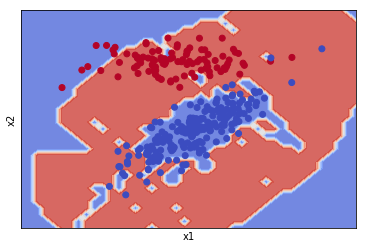

In [107]:
# width of Gaussian RBF kernel, to be determined with trial & errors
c=.2

# ETA_THRESHOLD (used in eqn 2 of paper), to be determined with trial & errors
ETA_THRESHOLD = .5

CENTER_DATA = False

# toy dataset (A) - Gaussian Mixture
target         = X[:n_samples[0], :]
background     = X[n_samples[0]:, :]

CLASS_LABELS = [1]*n_samples[0] + [0]*n_samples[1]
CLASS_LABELS = np.array(CLASS_LABELS)

#Gaussian_Radial Basis Function (GRBF) kernel
def k_GRBF(x, y):                     
    norm= np.linalg.norm(x - y)
    return np.exp(-1*norm*norm/c)
  
# K(x, Y)
def calculate_K_x_X(x):
    arr_ = []
    for i in range(background.shape[0]):
        val = k_GRBF(background[i,:].reshape(1,-1), x.reshape(1,-1))
        arr_.append(val)
    
    center = [(1/background.shape[0])*sum(arr_)]*len(arr_)
    center = np.array(center).reshape(-1,1)
    
    arr_ = np.array(arr_).reshape(-1,1)
    
    if CENTER_DATA:
        arr_ = arr_ - center
    return arr_


##### start K(X,X), K_Inv (eqn 13) #####
# Kernel/Gram Matrix for background pixels
K_XX = np.zeros((background.shape[0], background.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_XX.shape[0]):
    for j in range(K_XX.shape[1]):
        K_XX[i,j] = k_GRBF(background[i,:].reshape(1,-1), background[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_XX.shape)

# # if want to center K_YY
if CENTER_DATA:
    arr_ = [1.0/background.shape[0]]*background.shape[0]
    arr_ = np.array(arr_)
    i_N = np.diag(arr_)
    K_XX = K_XX - np.matmul(i_N, K_XX) - np.matmul(K_XX, i_N) + np.matmul(np.matmul(i_N, K_XX), i_N)

try:
    K_Inv = np.linalg.inv(K_XX)
except:
    K_Inv = np.linalg.pinv(K_XX) # calculating pseudo inverse if normal inverse gave errors

K_Inv2 = np.matmul(K_Inv, K_Inv)
print("K_Inv2 Shape", K_Inv2.shape)
##### end K(X,X), K_Inv (eqn 13) #####


_, inds = sympy.Matrix(target).T.rref()
independent_targets = target[np.array(inds)]
print("Independent Target Shape", independent_targets.shape)


# Kernel/Gram Matrix for target pixels
K_YY = np.zeros((independent_targets.shape[0], independent_targets.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_YY.shape[0]):
    for j in range(K_YY.shape[1]):
        K_YY[i,j] = k_GRBF(independent_targets[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_YY.shape)
eigenvectors, eigenmat = np.linalg.eig(K_YY)
eigen_diag = np.diag(eigenvectors**-.5)
Tau = np.matmul(eigenmat, eigen_diag)

# K(X,Y)
K_XY = np.zeros((background.shape[0], independent_targets.shape[0]))
for i in range(background.shape[0]):
    for j in range(independent_targets.shape[0]):
        K_XY[i,j] = k_GRBF(background[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("K_XY Shape:", K_XY.shape)

# if want to center K(X,Y)
if CENTER_DATA:
    arr_ = [1.0/independent_targets.shape[0]]*independent_targets.shape[0]
    arr_ = np.array(arr_)
    i_M = np.diag(arr_)
    K_XY = K_YX - np.matmul(i_N, K_XY) - np.matmul(K_XY, i_M) + np.matmul(np.matmul(i_N, K_XY), i_M)

# eqn 19
K_T = np.matmul(Tau.T, K_XY.T)
K_T = np.matmul(K_T, K_Inv2)
print("K_T Shape:", K_T.shape)

# matrix eqn 20
mat = np.matmul(Tau.T, K_XY.T)
mat = np.matmul(mat, K_Inv2)
mat = np.matmul(mat, K_XY)
mat = np.matmul(mat, Tau)
try:
    mat = np.linalg.inv(mat)
except:
    mat = np.linalg.pinv(mat)
print("mat shape:", mat.shape)

def KASD(x, threshold):
    # eqn 18
    vec = calculate_K_x_X(x)
    Kx_T = np.matmul(K_T, vec)
    Kx   = Kx_T.T
    numerator = np.matmul(Kx,mat)
    numerator = np.matmul(numerator, Kx_T)
    
    # denomiator
    K_x_X = calculate_K_x_X(x)
    K_x_X_T = K_x_X.reshape(1,-1)
    denominator = np.matmul(K_x_X_T, K_Inv2)
    denominator = np.matmul(denominator, K_x_X)
    denominator += 1e-5 # to avoid zero division
    
    ratio = numerator/denominator
#     print(ratio[0][0])
    
    if ratio[0][0]<=threshold: # threshold condition for eqn 2 of paper
        return 0 # background
    else:
        return 1 # target

# Gnerating predictions for contour plot on meshgrid
KASD_predictions_A = [] 
for i in range(xx_A.shape[0]*xx_A.shape[1]):
    x, y = xx_A.ravel()[i], yy_A.ravel()[i]
    label = KASD(np.array([x, y]).reshape(-1,1), threshold=ETA_THRESHOLD)
    KASD_predictions_A.append(label)
KASD_predictions_A = np.array(KASD_predictions_A).reshape(xx_A.shape)
print(KASD_predictions_A.shape)


# Generating predictions for various accuracy metrics for Toy Dataset (B)
preds = []
for i in range(X.shape[0]):
    label = KASD(X[i,:].reshape(-1,1), threshold=ETA_THRESHOLD)
    preds.append(label)
preds = np.array(preds)

KASD_accuracy_A = accuracy_score(preds, CLASS_LABELS)
KASD_precision_A = precision_score(preds, CLASS_LABELS)
KASD_recall_A = recall_score(preds, CLASS_LABELS)
KASD_f1_A = f1_score(preds, CLASS_LABELS)
print("Toy Dataset (B) - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(KASD_accuracy_A, KASD_precision_A, KASD_recall_A, KASD_f1_A))


plt.contourf(xx_A, yy_A, KASD_predictions_A, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(X[:,0], X[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_A.min(), xx_A.max())
plt.ylim(yy_A.min(), yy_A.max())
plt.xticks(())
plt.yticks(())

<a id="section3.2"></a>
## 3.2.  KASD (Gaussian RBF Kernel) on Toy Dataset (B) -  Nonlinearly Mapped Version Of Gaussian Mixture

Kernel Matrix Shape: (200, 200)
K_Inv2 Shape (200, 200)
Kernel Matrix Shape: (2, 2)
K_XY Shape: (200, 2)
K_T Shape: (2, 200)
mat shape: (2, 2)
(93, 42)
Toy Dataset (B) - accuracy: 0.91, precision:0.73, recall:1.00, f1:0.84


([], <a list of 0 Text yticklabel objects>)

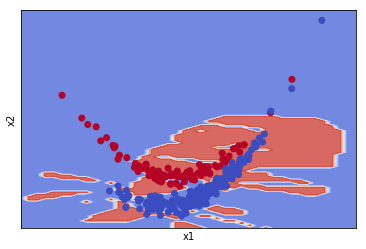

In [108]:
# width of Gaussian RBF kernel, to be determined with trial & errors
c=.25

# ETA_THRESHOLD (used in eqn 2 of paper), to be determined with trial & errors
ETA_THRESHOLD = .5

CENTER_DATA = False

# toy dataset (A) - Gaussian Mixture
target         = Y[:n_samples[0], :]
background     = Y[n_samples[0]:, :]

CLASS_LABELS = [1]*n_samples[0] + [0]*n_samples[1]
CLASS_LABELS = np.array(CLASS_LABELS)

#Gaussian_Radial Basis Function (GRBF) kernel
def k_GRBF(x, y):                     
    norm= np.linalg.norm(x - y)
    return np.exp(-1*norm*norm/c)
  
# K(x, Y)
def calculate_K_x_X(x):
    arr_ = []
    for i in range(background.shape[0]):
        val = k_GRBF(background[i,:].reshape(1,-1), x.reshape(1,-1))
        arr_.append(val)
    
    center = [(1/background.shape[0])*sum(arr_)]*len(arr_)
    center = np.array(center).reshape(-1,1)
    
    arr_ = np.array(arr_).reshape(-1,1)
    
    if CENTER_DATA:
        arr_ = arr_ - center
    return arr_


##### start K(X,X), K_Inv (eqn 13) #####
# Kernel/Gram Matrix for background pixels
K_XX = np.zeros((background.shape[0], background.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_XX.shape[0]):
    for j in range(K_XX.shape[1]):
        K_XX[i,j] = k_GRBF(background[i,:].reshape(1,-1), background[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_XX.shape)

# # if want to center K_YY
if CENTER_DATA:
    arr_ = [1.0/background.shape[0]]*background.shape[0]
    arr_ = np.array(arr_)
    i_N = np.diag(arr_)
    K_XX = K_XX - np.matmul(i_N, K_XX) - np.matmul(K_XX, i_N) + np.matmul(np.matmul(i_N, K_XX), i_N)

try:
    K_Inv = np.linalg.inv(K_XX)
except:
    K_Inv = np.linalg.pinv(K_XX) # calculating pseudo inverse if normal inverse gave errors

K_Inv2 = np.matmul(K_Inv, K_Inv)
print("K_Inv2 Shape", K_Inv2.shape)
##### end K(X,X), K_Inv (eqn 13) #####


_, inds = sympy.Matrix(target).T.rref()
independent_targets = target[np.array(inds)]
print("Independent Target Shape", independent_targets.shape)


# Kernel/Gram Matrix for target pixels
K_YY = np.zeros((independent_targets.shape[0], independent_targets.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_YY.shape[0]):
    for j in range(K_YY.shape[1]):
        K_YY[i,j] = k_GRBF(independent_targets[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_YY.shape)
eigenvectors, eigenmat = np.linalg.eig(K_YY)
eigen_diag = np.diag(eigenvectors**-.5)
Tau = np.matmul(eigenmat, eigen_diag)

# K(X,Y)
K_XY = np.zeros((background.shape[0], independent_targets.shape[0]))
for i in range(background.shape[0]):
    for j in range(independent_targets.shape[0]):
        K_XY[i,j] = k_GRBF(background[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("K_XY Shape:", K_XY.shape)

# if want to center K(X,Y)
if CENTER_DATA:
    arr_ = [1.0/independent_targets.shape[0]]*independent_targets.shape[0]
    arr_ = np.array(arr_)
    i_M = np.diag(arr_)
    K_XY = K_YX - np.matmul(i_N, K_XY) - np.matmul(K_XY, i_M) + np.matmul(np.matmul(i_N, K_XY), i_M)

# eqn 19
K_T = np.matmul(Tau.T, K_XY.T)
K_T = np.matmul(K_T, K_Inv2)
print("K_T Shape:", K_T.shape)

# matrix eqn 20
mat = np.matmul(Tau.T, K_XY.T)
mat = np.matmul(mat, K_Inv2)
mat = np.matmul(mat, K_XY)
mat = np.matmul(mat, Tau)
try:
    mat = np.linalg.inv(mat)
except:
    mat = np.linalg.pinv(mat)
print("mat shape:", mat.shape)

def KASD(x, threshold):
    # eqn 18
    vec = calculate_K_x_X(x)
    Kx_T = np.matmul(K_T, vec)
    Kx   = Kx_T.T
    numerator = np.matmul(Kx,mat)
    numerator = np.matmul(numerator, Kx_T)
    
    # denomiator
    K_x_X = calculate_K_x_X(x)
    K_x_X_T = K_x_X.reshape(1,-1)
    denominator = np.matmul(K_x_X_T, K_Inv2)
    denominator = np.matmul(denominator, K_x_X)
    denominator += 1e-5 # to avoid zero division
    
    ratio = numerator/denominator
#     print(ratio[0][0])
    
    if ratio[0][0]<=threshold: # threshold condition for eqn 2 of paper
        return 0 # background
    else:
        return 1 # target

# Gnerating predictions for contour plot on meshgrid
KASD_predictions_B = [] 
for i in range(xx_B.shape[0]*xx_B.shape[1]):
    x, y = xx_B.ravel()[i], yy_B.ravel()[i]
    label = KASD(np.array([x, y]).reshape(-1,1), threshold=ETA_THRESHOLD)
    KASD_predictions_B.append(label)
KASD_predictions_B = np.array(KASD_predictions_B).reshape(xx_B.shape)
print(KASD_predictions_B.shape)


# Generating predictions for various accuracy metrics for Toy Dataset (B)
preds = []
for i in range(Y.shape[0]):
    label = KASD(Y[i,:].reshape(-1,1), threshold=ETA_THRESHOLD)
    preds.append(label)
preds = np.array(preds)

KASD_accuracy_B = accuracy_score(preds, CLASS_LABELS)
KASD_precision_B = precision_score(preds, CLASS_LABELS)
KASD_recall_B = recall_score(preds, CLASS_LABELS)
KASD_f1_B = f1_score(preds, CLASS_LABELS)
print("Toy Dataset (B) - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(KASD_accuracy_B, KASD_precision_B, KASD_recall_B, KASD_f1_B))


plt.contourf(xx_B, yy_B, KASD_predictions_B, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(Y[:,0], Y[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_B.min(), xx_B.max())
plt.ylim(yy_B.min(), yy_B.max())
plt.xticks(())
plt.yticks(())

<a id="section3.3"></a>
## 3.3.  Save Combined Plots - KASD (Gaussian RBF Kernel)  (Decision Boundaries & Contour Plots)

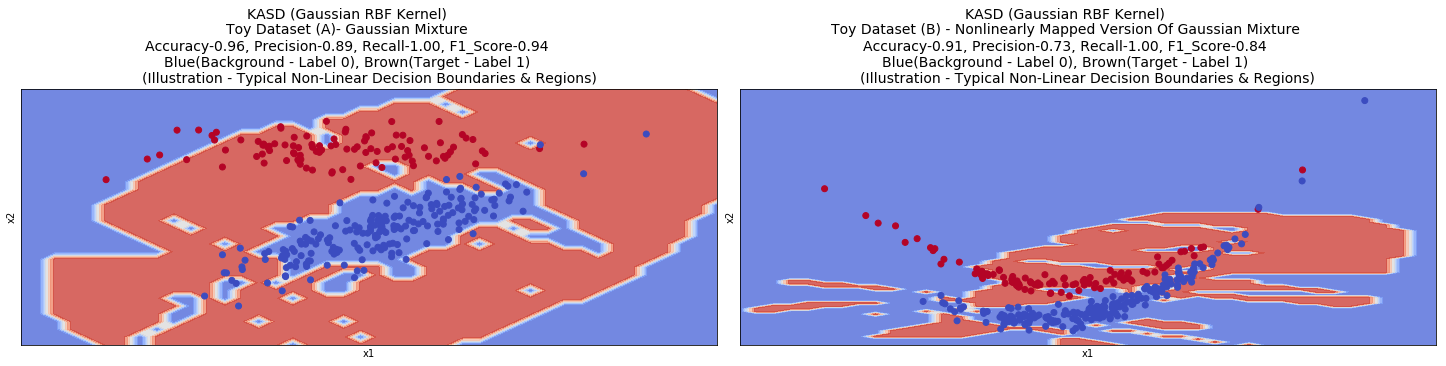

In [109]:
plt.figure(figsize=(20,5))

# Toy Dataset (A) - Gaussian Mixture
plt.subplot(121)
plt.contourf(xx_A, yy_A, KASD_predictions_A, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(X[:,0], X[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_A.min(), xx_A.max())
plt.ylim(yy_A.min(), yy_A.max())
plt.xticks(())
plt.yticks(())
plt.title("KASD (Gaussian RBF Kernel)\
          \nToy Dataset (A)- Gaussian Mixture\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}\
          \nBlue(Background - Label 0), Brown(Target - Label 1)\
          \n(Illustration - Typical Non-Linear Decision Boundaries & Regions)"\
          .format(KASD_accuracy_A, KASD_precision_A, KASD_recall_A, KASD_f1_A), size=14)

# Toy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture
plt.subplot(122)
plt.contourf(xx_B, yy_B, KASD_predictions_B, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(Y[:,0], Y[:,1], c=CLASS_LABELS, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx_B.min(), xx_B.max())
plt.ylim(yy_B.min(), yy_B.max())
plt.xticks(())
plt.yticks(())
plt.title("KASD (Gaussian RBF Kernel)\
          \nToy Dataset (B) - Nonlinearly Mapped Version Of Gaussian Mixture\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}\
          \nBlue(Background - Label 0), Brown(Target - Label 1)\
          \n(Illustration - Typical Non-Linear Decision Boundaries & Regions)"\
          .format(KASD_accuracy_B, KASD_precision_B, KASD_recall_B, KASD_f1_B), size=14)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("./pics/KASD_ToyDatasets.png")

<a id="section4"></a>
# 4.  Real Data

<a id="section4.1"></a>
## 4.1. HSI Image Preprocessing

### Make sure both HDR files are in ./data/ directory

In [4]:
# img = envi.open('../Reflect_f100517out.hdr', '../../Reflect_f100517out')

# read hdr specs file and hdr file
img = envi.open('./data/Reflect_f100517out.hdr', './data/Reflect_f100517out')
print("HSI Image Shape:", img.shape)


# wavelength: Red ~ 669, Green ~ 549, Blue ~ 474 
# selected resp. spectral band index from hdr file (Reflect_f100517out.hdr) with closest wavelength matching
rgb_bands = (32, 20, 12)


# an orange pixel (oil spill) which is considered target pixel
# an orange pixel is selected at spatial index [11461, 353, :] from Full Image - RGB Channels (sec 2.1) below
target_spectrum = img[11461, 353, :].reshape(1, -1) # shape [1, 224] 224 spectral bands
target_spectrum_rgb = img[11461, 353, rgb_bands].reshape(1, -1) # shape [1, 3] RGB spectral bands


# Manually selected an ROI around the orange target pixel
ROI = img[11420:11496,100:385, :] # bigger ROI with one ship too shape [285, 76]
print("ROI Shape:", ROI.shape)

# ROI_small = img[11430:11485,300:385, :] # another smaller ROI of shape [55, 85]
# print("ROI Shape:", ROI_small.shape)  


# Ground truth - same spatial dimensions as ROI but only 3 spectral channels/bands for RGB visualization
GT_RGB = np.zeros((ROI.shape[0], ROI.shape[1], 3)) # initialize with black pixels
for i in range(GT_RGB.shape[0]):
    for j in range(GT_RGB.shape[1]):
        pixel_spectrum = ROI[i,j,:].reshape(1, -1)
        
        # e.g. current pixel's spectrum values euclidean distance from target_spectrum
        taregt_pixel_distance = np.sqrt(np.sum(target_spectrum - pixel_spectrum)**2)
        
        if taregt_pixel_distance <= 5: # can try other values
            GT_RGB[i,j,:] = 1 # white 

print("GT_RGB  Shape:", GT_RGB.shape)   

HSI Image Shape: (26159, 796, 224)
ROI Shape: (76, 285, 224)
GT_RGB  Shape: (76, 285, 3)


<a id="section4.2"></a>
## 4.2.  Full Image Visualization - RGB Channels (26159 x 796)

In [26]:
# read the rgb bands of image for visualization
img_rgb = img[:,:,rgb_bands]
print(img_rgb.shape)

# image size too big to be visualized here, so save for visualization separately
full_img = np.rint(img_rgb*255) # round off, integers between 0 - 255
full_img = Image.fromarray(full_img.astype(np.uint8))
full_img.save("./pics/Full_img_RGB_Bands_" + str(rgb_bands) + ".png")

(26159, 796, 3)


<a id="section4.3"></a>
## 4.3.  ROI Visualization - RGB Channels (285x76)

ROI_RGB Shape: (76, 285, 3)


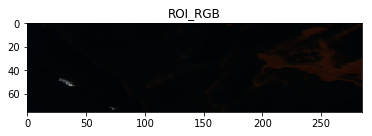

In [5]:
ROI_RGB = ROI[:, :, rgb_bands]
print("ROI_RGB Shape:", ROI_RGB.shape)

plt.imshow(ROI_RGB)
plt.title("ROI_RGB")
plt.savefig("./pics/ROI_RGB.png")

<a id="section4.4"></a>
## 4.4.  ROI Ground Truth - RGB Channels (285x76)

GT_RGB Shape: (76, 285, 3)


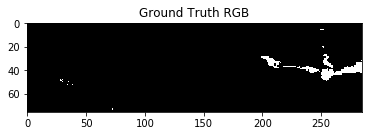

In [6]:
print("GT_RGB Shape:", GT_RGB.shape)

plt.imshow(GT_RGB)
plt.title("Ground Truth RGB")
plt.savefig("./pics/GT_RGB.png")

<a id="section5"></a>
# 5. ASD & KASD on ROI

#### There are ~22K pixels (285*76 = 21660) & this will take a lot of time for K(X,Y) & K(X,X) Calcuation in KASD (sec 5.2-5.4 below) , so using k-means clustering to reduce the sample size

#### the best value of c, ETA_THRESHOLD & CENTER_DATA (in (sec 5.2-5.4 below) will vary from case to case based on data & needs to be found for each case separately with experimentation

In [15]:
# Using k-means clustering to reduce data sample size
background, target = [], []
for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_rgb = ROI[i, j, rgb_bands].reshape(-1,1)
        
        # eucleadean distance between current spectral band and taregt spectrum band of the orange pixel
        target_distance = np.sqrt(np.sum(current_pixel_rgb - target_spectrum_rgb)**2)
        
        if target_distance > .1: # we used threshold of 5 in sec 1
            background.append(ROI[i, j, :].reshape(-1,1))
        else:
            target.append(ROI[i, j, :].reshape(-1,1))

background = np.array(background)
background = background.reshape(background.shape[0], background.shape[1])
print("background Pixels Shape:", background.shape)

kmeans_background = KMeans(n_clusters=300, random_state=0).fit(background)
centroids_background = kmeans_background.cluster_centers_
print("Background Centroids Shape:", centroids_background.shape)
background = centroids_background


target = np.array(target)
target = target.reshape(target.shape[0], target.shape[1])
print("Target Pixels Shape:", target.shape)

kmeans_target = KMeans(n_clusters=300, random_state=0).fit(target)
centroids_target = kmeans_target.cluster_centers_
print("Target Centroids Shape:", centroids_target.shape)
target = centroids_target


# independent targets needed for K(X,Y) & K(Y,Y) calculation later
_, inds = sympy.Matrix(target).T.rref()
independent_targets = target[np.array(inds)]
print("Independent Target Shape", independent_targets.shape)

background Pixels Shape: (20750, 224)
Background Centroids Shape: (300, 224)
Target Pixels Shape: (910, 224)
Target Centroids Shape: (300, 224)
Independent Target Shape (187, 224)


<a id="section5.1"></a>
## 5.1.  ASD

background_pixels Pixels Shape: (224, 21655)
target_pixels Pixels Shape: (224, 5)
U Shape: (224, 5)
Covariance Matrix Shape: (224, 224)
Inverse Covariance Matrix Shape: (224, 224)
mat Shape: (5, 5)
ROI - accuracy: 0.94, precision:0.40, recall:0.13, f1:0.20


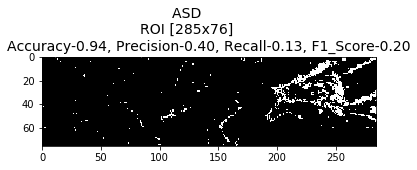

In [27]:
ETA_THRESHOLD = 42000 # needed for threshold condition of eqn 2

# For ASD we needed to use a different threshold to make it work than above
# gathering some sample background_pixels & target_pixels pixels based on euclidean distance of a pixel from target_pixels_spectrum
background_pixels, target_pixels = [], []
for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_spectrum = ROI[i, j, :].reshape(-1,1)
        
        # eucleadean distance between current spectral band and taregt spectrum band of the orange pixel
        target_pixels_distance = np.sqrt(np.sum(current_pixel_spectrum - target_spectrum)**2)
        
        if target_pixels_distance > 5: # just a threshold
            background_pixels.append(ROI[i, j, :].reshape(-1,1))
        else:
            target_pixels.append(ROI[i, j, :].reshape(-1,1))

background_pixels = np.array(background_pixels)
background_pixels = background_pixels.reshape(background_pixels.shape[0], background_pixels.shape[1])
background_pixels = background_pixels.T
print("background_pixels Pixels Shape:", background_pixels.shape)

target_pixels = np.array(target_pixels)
target_pixels = target_pixels.reshape(target_pixels.shape[0], target_pixels.shape[1])
target_pixels = target_pixels.T
print("target_pixels Pixels Shape:", target_pixels.shape)


# QR Decomposition (Q.T is denoted a U in eqn 1 of paper)
Q, _ = np.linalg.qr(target_pixels)
U = Q
print("U Shape:", U.shape)

C = np.cov(target_pixels)
print("Covariance Matrix Shape:", C.shape)

try:
    C_Inv = np.linalg.inv(C)
except:
    C_Inv = np.linalg.pinv(C) # if normal inverse fails

print("Inverse Covariance Matrix Shape:", C_Inv.shape)

# this matrix (U^T * C^-1 * U) is used many times in ASD function below so creating a variable for it
mat = np.matmul(np.matmul(U.T, C_Inv), U)
print("mat Shape:", mat.shape)

def ASD(x):
    # eqn 2 of paper
    numerator = np.matmul(x.T, C_Inv)
    numerator = np.matmul(numerator,U)
    numerator = np.matmul(numerator, mat)
    numerator = np.matmul(numerator, U.T)
    numerator = np.matmul(numerator, C_Inv)
    numerator = np.matmul(numerator, x)
    
    denominator = np.matmul(x.T, C_Inv)
    denominator = np.matmul(denominator, x)
    denominator += 1e-5 # to avoid zero division

    ratio = numerator/denominator # equation 2 of paper 
    
    return ratio

# Generate predictions from ASD method for ROI
predictions_ASD = np.zeros((ROI.shape[0],ROI.shape[1],3))
y_ASD = []

PREDS_ASD, GT_LABELS_ASD = [], []

for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_spectrum = ROI[i,j,:]

        # 
        y = ASD(current_pixel_spectrum)
#         print(y)
        if y <= ETA_THRESHOLD:
            predictions_ASD[i,j,:] = 0
        else:
            predictions_ASD[i,j,:] = 1
            
        # save y value for thresholding for ROC curve later
        y_ASD.append(y)
            
        # Save 0/1 labels for sklearn's various accuracy & metric calculation below   
        gt = sum(GT_RGB[i,j,:])
        if gt == 0.0:
            GT_LABELS_ASD.append(0)
        else:
            GT_LABELS_ASD.append(1)
    
        pred = sum(predictions_ASD[i,j,:])            
        if pred == 0.0:
            PREDS_ASD.append(0)
        else:
            PREDS_ASD.append(1)        

# let's save these so as to directlt load later rather than rerun the code
with open("./kernel_data/predictions_ASD.pkl","wb") as f:
    pkl.dump(predictions_ASD, f)
with open("./kernel_data/y_ASD.pkl","wb") as f:
    pkl.dump(y_ASD, f)
with open("./kernel_data/PREDS_ASD.pkl","wb") as f:
    pkl.dump(PREDS_ASD, f)
with open("./kernel_data/GT_LABELS_ASD.pkl","wb") as f:
    pkl.dump(GT_LABELS_ASD, f) 
    
    
# various sklearn's metric
accuracy_ASD = accuracy_score(PREDS_ASD, GT_LABELS_ASD)
precision_ASD = precision_score(PREDS_ASD, GT_LABELS_ASD)
recall_ASD = recall_score(PREDS_ASD, GT_LABELS_ASD)
f1_ASD = f1_score(PREDS_ASD, GT_LABELS_ASD)
print("ROI - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(accuracy_ASD, precision_ASD, recall_ASD, f1_ASD))

plt.imshow(predictions_ASD)
plt.title("ASD\
          \nROI [285x76]\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}"\
          .format(accuracy_ASD, precision_ASD, recall_ASD, f1_ASD), size=14)

plt.savefig("./pics/ROI_ASD.png")

<a id="section5.2"></a>
## 5.2.  KASD (Gaussian RBF Kernel)

Kernel Matrix Shape: (300, 300)
K_Inv2 Shape (300, 300)
Kernel Matrix Shape: (187, 187)
K_XY Shape: (300, 187)
K_T Shape: (187, 300)
mat shape: (187, 187)
ROI - accuracy: 0.97, precision:0.65, recall:0.31, f1:0.42


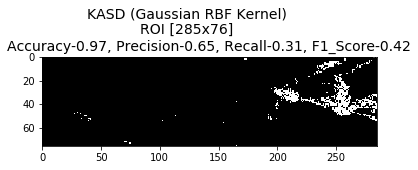

In [39]:
# width of Gaussian RBF kernel, to be determined with trial & errors
c=.08

#Gaussian_Radial Basis Function (GRBF) kernel
def k_GRBF(x, y):                     
    norm= np.linalg.norm(x - y)
    return np.exp(-1*norm*norm/c)

# ETA_THRESHOLD (used in eqn 22 of paper), to be determined with trial & errors
ETA_THRESHOLD = .99

CENTER_DATA = False

# K(x, Y)
def calculate_K_x_X(x):
    arr_ = []
    for i in range(background.shape[0]):
        val = k_GRBF(background[i,:].reshape(1,-1), x.reshape(1,-1))
        arr_.append(val)
    
    center = [(1/background.shape[0])*sum(arr_)]*len(arr_)
    center = np.array(center).reshape(-1,1)
    
    arr_ = np.array(arr_).reshape(-1,1)
    
    if CENTER_DATA:
        arr_ = arr_ - center
    return arr_


##### start K(X,X), K_Inv (eqn 13) #####
# Kernel/Gram Matrix for background pixels
K_XX = np.zeros((background.shape[0], background.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_XX.shape[0]):
    for j in range(K_XX.shape[1]):
        K_XX[i,j] = k_GRBF(background[i,:].reshape(1,-1), background[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_XX.shape)

# # if want to center K_YY
if CENTER_DATA:
    arr_ = [1.0/background.shape[0]]*background.shape[0]
    arr_ = np.array(arr_)
    i_N = np.diag(arr_)
    K_XX = K_XX - np.matmul(i_N, K_XX) - np.matmul(K_XX, i_N) + np.matmul(np.matmul(i_N, K_XX), i_N)

try:
    K_Inv = np.linalg.inv(K_XX)
except:
    K_Inv = np.linalg.pinv(K_XX) # calculating pseudo inverse if normal inverse gave errors

K_Inv2 = np.matmul(K_Inv, K_Inv)
print("K_Inv2 Shape", K_Inv2.shape)
##### end K(X,X), K_Inv (eqn 13) #####


# Kernel/Gram Matrix for independent target pixels
K_YY = np.zeros((independent_targets.shape[0], independent_targets.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_YY.shape[0]):
    for j in range(K_YY.shape[1]):
        K_YY[i,j] = k_GRBF(independent_targets[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_YY.shape)
eigenvectors, eigenmat = np.linalg.eig(K_YY)
eigen_diag = np.diag(eigenvectors**-.5)
Tau = np.matmul(eigenmat, eigen_diag)

# K(X,Y)
K_XY = np.zeros((background.shape[0], independent_targets.shape[0]))
for i in range(background.shape[0]):
    for j in range(independent_targets.shape[0]):
        K_XY[i,j] = k_GRBF(background[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("K_XY Shape:", K_XY.shape)

# if want to center K(X,Y)
if CENTER_DATA:
    arr_ = [1.0/independent_targets.shape[0]]*independent_targets.shape[0]
    arr_ = np.array(arr_)
    i_M = np.diag(arr_)
    K_XY = K_XY - np.matmul(i_N, K_XY) - np.matmul(K_XY, i_M) + np.matmul(np.matmul(i_N, K_XY), i_M)

# eqn 19
K_T = np.matmul(Tau.T, K_XY.T)
K_T = np.matmul(K_T, K_Inv2)
print("K_T Shape:", K_T.shape)

# matrix eqn 20
mat = np.matmul(Tau.T, K_XY.T)
mat = np.matmul(mat, K_Inv2)
mat = np.matmul(mat, K_XY)
mat = np.matmul(mat, Tau)
try:
    mat = np.linalg.inv(mat)
except:
    mat = np.linalg.pinv(mat)
print("mat shape:", mat.shape)

def KASD(x):
    # eqn 18
    vec = calculate_K_x_X(x)
    Kx_T = np.matmul(K_T, vec)
    Kx   = Kx_T.T
    numerator = np.matmul(Kx,mat)
    numerator = np.matmul(numerator, Kx_T)
    
    # denomiator
    K_x_X = calculate_K_x_X(x)
    K_x_X_T = K_x_X.reshape(1,-1)
    denominator = np.matmul(K_x_X_T, K_Inv2)
    denominator = np.matmul(denominator, K_x_X)
    denominator += 1e-5 # to avoid zero division
    
    ratio = numerator/denominator
    
    return ratio

# Generate predictions from ASD method for ROI
predictions_KASD_Gaussian = np.zeros((ROI.shape[0],ROI.shape[1],3))
y_KASD_Gaussian = []
PREDS_KASD_Gaussian, GT_LABELS_KASD_Gaussian = [], []

for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_spectrum = ROI[i,j,:]

        # Get Predictions
        y = KASD(current_pixel_spectrum)
        y = y[0][0]
#         print(y)

        if y <= ETA_THRESHOLD:
            predictions_KASD_Gaussian[i,j,:] = 0
        else:
            predictions_KASD_Gaussian[i,j,:] = 1
            
        # save y value for thresholding for ROC curve later
        y_KASD_Gaussian.append(y)
            
        # Save 0/1 labels for sklearn's various accuracy & metric calculation below   
        gt = sum(GT_RGB[i,j,:])
        if gt == 0.0:
            GT_LABELS_KASD_Gaussian.append(0)
        else:
            GT_LABELS_KASD_Gaussian.append(1)
    
        pred = sum(predictions_KASD_Gaussian[i,j,:])            
        if pred == 0.0:
            PREDS_KASD_Gaussian.append(0)
        else:
            PREDS_KASD_Gaussian.append(1)        

# let's save these so as to directlt load later rather than rerun the code
with open("./kernel_data/predictions_KASD_Gaussian.pkl","wb") as f:
    pkl.dump(predictions_KASD_Gaussian, f)
with open("./kernel_data/y_KASD_Gaussian.pkl","wb") as f:
    pkl.dump(y_KASD_Gaussian, f)
with open("./kernel_data/PREDS_KASD_Gaussian.pkl","wb") as f:
    pkl.dump(PREDS_KASD_Gaussian, f)
with open("./kernel_data/GT_LABELS_KASD_Gaussian.pkl","wb") as f:
    pkl.dump(GT_LABELS_KASD_Gaussian, f)  
    

# various sklearn's metric
accuracy_KASD_Gaussian = accuracy_score(PREDS_KASD_Gaussian, GT_LABELS_KASD_Gaussian)
precision_KASD_Gaussian = precision_score(PREDS_KASD_Gaussian, GT_LABELS_KASD_Gaussian)
recall_KASD_Gaussian = recall_score(PREDS_KASD_Gaussian, GT_LABELS_KASD_Gaussian)
f1_KASD_Gaussian = f1_score(PREDS_KASD_Gaussian, GT_LABELS_KASD_Gaussian)
print("ROI - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(accuracy_KASD_Gaussian, precision_KASD_Gaussian, recall_KASD_Gaussian, f1_KASD_Gaussian))

plt.imshow(predictions_KASD_Gaussian)
plt.title("KASD (Gaussian RBF Kernel)\
          \nROI [285x76]\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}"\
          .format(accuracy_KASD_Gaussian, precision_KASD_Gaussian, recall_KASD_Gaussian, f1_KASD_Gaussian), size=14)

plt.savefig("./pics/ROI_KASD_GaussianRBFKernel.png")

<a id="section5.3"></a>
## 5.3.  KASD (Polynomial Kernel)

Kernel Matrix Shape: (300, 300)
K_Inv2 Shape (300, 300)
Kernel Matrix Shape: (187, 187)
K_XY Shape: (300, 187)
K_T Shape: (187, 300)
mat shape: (187, 187)
ROI - accuracy: 0.95, precision:0.98, recall:0.29, f1:0.44


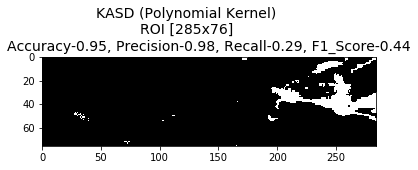

In [26]:
d= 5 #power parameter of polynomial kernel, tbd
theta= 1 #constant term for polynomial kernel, tbd

# ETA_THRESHOLD (used in eqn 22 of paper), to be determined with trial & errors
ETA_THRESHOLD = .995

CENTER_DATA = False

#Polynomial Kernel.
def k_poly(x,y):                        
    return np.power(np.dot(x,y.T)+theta, d)


# K(x, Y)
def calculate_K_x_X(x):
    arr_ = []
    for i in range(background.shape[0]):
        val = k_poly(background[i,:].reshape(1,-1), x.reshape(1,-1))
        arr_.append(val)
    
    center = [(1/background.shape[0])*sum(arr_)]*len(arr_)
    center = np.array(center).reshape(-1,1)
    
    arr_ = np.array(arr_).reshape(-1,1)
    
    if CENTER_DATA:
        arr_ = arr_ - center
    return arr_


##### start K(X,X), K_Inv (eqn 13) #####
# Kernel/Gram Matrix for background pixels
K_XX = np.zeros((background.shape[0], background.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_XX.shape[0]):
    for j in range(K_XX.shape[1]):
        K_XX[i,j] = k_poly(background[i,:].reshape(1,-1), background[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_XX.shape)

# # if want to center K_YY
if CENTER_DATA:
    arr_ = [1.0/background.shape[0]]*background.shape[0]
    arr_ = np.array(arr_)
    i_N = np.diag(arr_)
    K_XX = K_XX - np.matmul(i_N, K_XX) - np.matmul(K_XX, i_N) + np.matmul(np.matmul(i_N, K_XX), i_N)

try:
    K_Inv = np.linalg.inv(K_XX)
except:
    K_Inv = np.linalg.pinv(K_XX) # calculating pseudo inverse if normal inverse gave errors

K_Inv2 = np.matmul(K_Inv, K_Inv)
print("K_Inv2 Shape", K_Inv2.shape)
##### end K(X,X), K_Inv (eqn 13) #####


# Kernel/Gram Matrix for independent target pixels
K_YY = np.zeros((independent_targets.shape[0], independent_targets.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_YY.shape[0]):
    for j in range(K_YY.shape[1]):
        K_YY[i,j] = k_poly(independent_targets[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_YY.shape)
eigenvectors, eigenmat = np.linalg.eig(K_YY)
eigen_diag = np.diag(eigenvectors**-.5)
Tau = np.matmul(eigenmat, eigen_diag)

# K(X,Y)
K_XY = np.zeros((background.shape[0], independent_targets.shape[0]))
for i in range(background.shape[0]):
    for j in range(independent_targets.shape[0]):
        K_XY[i,j] = k_poly(background[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("K_XY Shape:", K_XY.shape)

# if want to center K(X,Y)
if CENTER_DATA:
    arr_ = [1.0/independent_targets.shape[0]]*independent_targets.shape[0]
    arr_ = np.array(arr_)
    i_M = np.diag(arr_)
    K_XY = K_XY - np.matmul(i_N, K_XY) - np.matmul(K_XY, i_M) + np.matmul(np.matmul(i_N, K_XY), i_M)

# eqn 19
K_T = np.matmul(Tau.T, K_XY.T)
K_T = np.matmul(K_T, K_Inv2)
print("K_T Shape:", K_T.shape)

# matrix eqn 20
mat = np.matmul(Tau.T, K_XY.T)
mat = np.matmul(mat, K_Inv2)
mat = np.matmul(mat, K_XY)
mat = np.matmul(mat, Tau)
try:
    mat = np.linalg.inv(mat)
except:
    mat = np.linalg.pinv(mat)
print("mat shape:", mat.shape)

def KASD(x):
    # eqn 18
    vec = calculate_K_x_X(x)
    Kx_T = np.matmul(K_T, vec)
    Kx   = Kx_T.T
    numerator = np.matmul(Kx,mat)
    numerator = np.matmul(numerator, Kx_T)
    
    # denomiator
    K_x_X = calculate_K_x_X(x)
    K_x_X_T = K_x_X.reshape(1,-1)
    denominator = np.matmul(K_x_X_T, K_Inv2)
    denominator = np.matmul(denominator, K_x_X)
    denominator += 1e-5 # to avoid zero division
    
    ratio = numerator/denominator
    
    return ratio

# Generate predictions from ASD method for ROI
predictions_KASD_Polynomial = np.zeros((ROI.shape[0],ROI.shape[1],3))
y_KASD_Polynomial = []
PREDS_KASD_Polynomial, GT_LABELS_KASD_Polynomial = [], []

for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_spectrum = ROI[i,j,:]

        # Get Predictions
        y = KASD(current_pixel_spectrum)
        y = y[0][0]
#         print(y)
        
        if y <= ETA_THRESHOLD:
            predictions_KASD_Polynomial[i,j,:] = 0
        else:
            predictions_KASD_Polynomial[i,j,:] = 1
            
        # save y value for thresholding for ROC curve later
        y_KASD_Polynomial.append(y)
            
        # Save 0/1 labels for sklearn's various accuracy & metric calculation below   
        gt = sum(GT_RGB[i,j,:])
        if gt == 0.0:
            GT_LABELS_KASD_Polynomial.append(0)
        else:
            GT_LABELS_KASD_Polynomial.append(1)
    
        pred = sum(predictions_KASD_Polynomial[i,j,:])            
        if pred == 0.0:
            PREDS_KASD_Polynomial.append(0)
        else:
            PREDS_KASD_Polynomial.append(1)        

# let's save these so as to directlt load later rather than rerun the code
with open("./kernel_data/predictions_KASD_Polynomial.pkl","wb") as f:
    pkl.dump(predictions_KASD_Polynomial, f)
with open("./kernel_data/y_KASD_Polynomial.pkl","wb") as f:
    pkl.dump(y_KASD_Polynomial, f)
with open("./kernel_data/PREDS_KASD_Polynomial.pkl","wb") as f:
    pkl.dump(PREDS_KASD_Polynomial, f)
with open("./kernel_data/GT_LABELS_KASD_Polynomial.pkl","wb") as f:
    pkl.dump(GT_LABELS_KASD_Polynomial, f) 
    
    
# various sklearn's metric
accuracy_KASD_Polynomial = accuracy_score(PREDS_KASD_Polynomial, GT_LABELS_KASD_Polynomial)
precision_KASD_Polynomial= precision_score(PREDS_KASD_Polynomial, GT_LABELS_KASD_Polynomial)
recall_KASD_Polynomial = recall_score(PREDS_KASD_Polynomial, GT_LABELS_KASD_Polynomial)
f1_KASD_Polynomial = f1_score(PREDS_KASD_Polynomial, GT_LABELS_KASD_Polynomial)
print("ROI - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(accuracy_KASD_Polynomial, precision_KASD_Polynomial, recall_KASD_Polynomial, f1_KASD_Polynomial))

plt.imshow(predictions_KASD_Polynomial)
plt.title("KASD (Polynomial Kernel)\
          \nROI [285x76]\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}"\
          .format(accuracy_KASD_Polynomial, precision_KASD_Polynomial, recall_KASD_Polynomial, f1_KASD_Polynomial), size=14)

plt.savefig("./pics/ROI_KASD_PolynomialKernel.png")

<a id="section5.4"></a>
## 5.4.  KASD (Spectral Angle Kernel)

Kernel Matrix Shape: (300, 300)
K_Inv2 Shape (300, 300)
Kernel Matrix Shape: (187, 187)
K_XY Shape: (300, 187)
K_T Shape: (187, 300)
mat shape: (187, 187)
ROI - accuracy: 0.93, precision:0.06, recall:0.02, f1:0.03


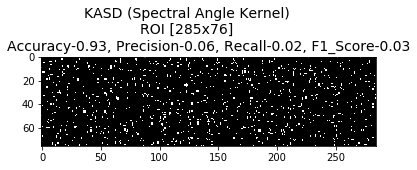

In [29]:
#Spectral angle_based kernel.
def k_spectral(x, y):        
    norm_x= np.linalg.norm(x)
    norm_y= np.linalg.norm(y)
    dot= x.dot(y.T)
    return dot/(norm_x*norm_y)

# ETA_THRESHOLD (used in eqn 22 of paper), to be determined with trial & errors
ETA_THRESHOLD = 2.5

CENTER_DATA = False


# K(x, Y)
def calculate_K_x_X(x):
    arr_ = []
    for i in range(background.shape[0]):
        val = k_spectral(background[i,:].reshape(1,-1), x.reshape(1,-1))
        arr_.append(val)
    
    center = [(1/background.shape[0])*sum(arr_)]*len(arr_)
    center = np.array(center).reshape(-1,1)
    
    arr_ = np.array(arr_).reshape(-1,1)
    
    if CENTER_DATA:
        arr_ = arr_ - center
    return arr_


##### start K(X,X), K_Inv (eqn 13) #####
# Kernel/Gram Matrix for background pixels
K_XX = np.zeros((background.shape[0], background.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_XX.shape[0]):
    for j in range(K_XX.shape[1]):
        K_XX[i,j] = k_spectral(background[i,:].reshape(1,-1), background[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_XX.shape)

# # if want to center K_YY
if CENTER_DATA:
    arr_ = [1.0/background.shape[0]]*background.shape[0]
    arr_ = np.array(arr_)
    i_N = np.diag(arr_)
    K_XX = K_XX - np.matmul(i_N, K_XX) - np.matmul(K_XX, i_N) + np.matmul(np.matmul(i_N, K_XX), i_N)

try:
    K_Inv = np.linalg.inv(K_XX)
except:
    K_Inv = np.linalg.pinv(K_XX) # calculating pseudo inverse if normal inverse gave errors

K_Inv2 = np.matmul(K_Inv, K_Inv)
print("K_Inv2 Shape", K_Inv2.shape)
##### end K(X,X), K_Inv (eqn 13) #####


# Kernel/Gram Matrix for independent target pixels
K_YY = np.zeros((independent_targets.shape[0], independent_targets.shape[0])) # K(Y,Y) the gram matrix
for i in range(K_YY.shape[0]):
    for j in range(K_YY.shape[1]):
        K_YY[i,j] = k_spectral(independent_targets[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("Kernel Matrix Shape:", K_YY.shape)
eigenvectors, eigenmat = np.linalg.eig(K_YY)
eigen_diag = np.diag(eigenvectors**-.5)
Tau = np.matmul(eigenmat, eigen_diag)

# K(X,Y)
K_XY = np.zeros((background.shape[0], independent_targets.shape[0]))
for i in range(background.shape[0]):
    for j in range(independent_targets.shape[0]):
        K_XY[i,j] = k_spectral(background[i,:].reshape(1,-1), independent_targets[j,:].reshape(1,-1))
print("K_XY Shape:", K_XY.shape)

# if want to center K(X,Y)
if CENTER_DATA:
    arr_ = [1.0/independent_targets.shape[0]]*independent_targets.shape[0]
    arr_ = np.array(arr_)
    i_M = np.diag(arr_)
    K_XY = K_XY - np.matmul(i_N, K_XY) - np.matmul(K_XY, i_M) + np.matmul(np.matmul(i_N, K_XY), i_M)

# eqn 19
K_T = np.matmul(Tau.T, K_XY.T)
K_T = np.matmul(K_T, K_Inv2)
print("K_T Shape:", K_T.shape)

# matrix eqn 20
mat = np.matmul(Tau.T, K_XY.T)
mat = np.matmul(mat, K_Inv2)
mat = np.matmul(mat, K_XY)
mat = np.matmul(mat, Tau)
try:
    mat = np.linalg.inv(mat)
except:
    mat = np.linalg.pinv(mat)
print("mat shape:", mat.shape)

def KASD(x):
    # eqn 18
    vec = calculate_K_x_X(x)
    Kx_T = np.matmul(K_T, vec)
    Kx   = Kx_T.T
    numerator = np.matmul(Kx,mat)
    numerator = np.matmul(numerator, Kx_T)
    
    # denomiator
    K_x_X = calculate_K_x_X(x)
    K_x_X_T = K_x_X.reshape(1,-1)
    denominator = np.matmul(K_x_X_T, K_Inv2)
    denominator = np.matmul(denominator, K_x_X)
    denominator += 1e-5 # to avoid zero division
    
    ratio = numerator/denominator
    
    return ratio

# Generate predictions from ASD method for ROI
predictions_KASD_SpectralAngle = np.zeros((ROI.shape[0],ROI.shape[1],3))
y_KASD_SpectralAngle = []
PREDS_KASD_SpectralAngle, GT_LABELS_KASD_SpectralAngle = [], []

for i in range(ROI.shape[0]):
    for j in range(ROI.shape[1]):
        current_pixel_spectrum = ROI[i,j,:]

        # Get Predictions
        y = KASD(current_pixel_spectrum)
        y = y[0][0]
#         print(y)
        
        if y <= ETA_THRESHOLD:
            predictions_KASD_SpectralAngle[i,j,:] = 0
        else:
            predictions_KASD_SpectralAngle[i,j,:] = 1
            
        # save y value for thresholding for ROC curve later
        y_KASD_SpectralAngle.append(y)
            
        # Save 0/1 labels for sklearn's various accuracy & metric calculation below   
        gt = sum(GT_RGB[i,j,:])
        if gt == 0.0:
            GT_LABELS_KASD_SpectralAngle.append(0)
        else:
            GT_LABELS_KASD_SpectralAngle.append(1)
    
        pred = sum(predictions_KASD_SpectralAngle[i,j,:])            
        if pred == 0.0:
            PREDS_KASD_SpectralAngle.append(0)
        else:
            PREDS_KASD_SpectralAngle.append(1)        

# let's save these so as to directlt load later rather than rerun the code
with open("./kernel_data/predictions_KASD_SpectralAngle.pkl","wb") as f:
    pkl.dump(predictions_KASD_SpectralAngle, f)
with open("./kernel_data/y_KASD_SpectralAngle.pkl","wb") as f:
    pkl.dump(y_KASD_SpectralAngle, f)
with open("./kernel_data/PREDS_KASD_SpectralAngle.pkl","wb") as f:
    pkl.dump(PREDS_KASD_SpectralAngle, f)
with open("./kernel_data/GT_LABELS_KASD_SpectralAngle.pkl","wb") as f:
    pkl.dump(GT_LABELS_KASD_SpectralAngle, f) 

# various sklearn's metric
accuracy_KASD_SpectralAngle = accuracy_score(PREDS_KASD_SpectralAngle, GT_LABELS_KASD_SpectralAngle)
precision_KASD_SpectralAngle= precision_score(PREDS_KASD_SpectralAngle, GT_LABELS_KASD_SpectralAngle)
recall_KASD_SpectralAngle = recall_score(PREDS_KASD_SpectralAngle, GT_LABELS_KASD_SpectralAngle)
f1_KASD_SpectralAngle = f1_score(PREDS_KASD_SpectralAngle, GT_LABELS_KASD_SpectralAngle)
print("ROI - accuracy: {:.2f}, precision:{:.2f}, recall:{:.2f}, f1:{:.2f}".\
      format(accuracy_KASD_SpectralAngle, precision_KASD_SpectralAngle, recall_KASD_SpectralAngle, f1_KASD_SpectralAngle))

plt.imshow(predictions_KASD_SpectralAngle)
plt.title("KASD (Spectral Angle Kernel)\
          \nROI [285x76]\
          \nAccuracy-{:.2f}, Precision-{:.2f}, Recall-{:.2f}, F1_Score-{:.2f}"\
          .format(accuracy_KASD_SpectralAngle, precision_KASD_SpectralAngle, recall_KASD_SpectralAngle, f1_KASD_SpectralAngle), size=14)

plt.savefig("./pics/ROI_KASD_SpectralAngleKernel.png")

<a id="section6"></a>
## 6.  ROC Curve

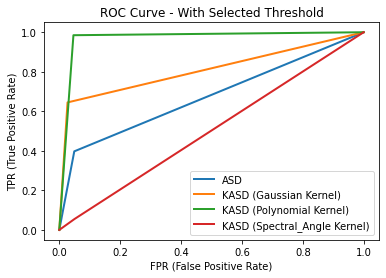

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# reload all pickle files for plotting 

with open("./kernel_data/y_ASD.pkl","rb") as f:
    y_ASD = pkl.load(f)
with open("./kernel_data/PREDS_ASD.pkl","rb") as f:
    PREDS_ASD = pkl.load(f)
with open("./kernel_data/GT_LABELS_ASD.pkl","rb") as f:
    GT_LABELS_ASD = pkl.load(f)
    
    
with open("./kernel_data/y_KASD_Gaussian.pkl","rb") as f:
    y_KASD_Gaussian = pkl.load(f)
with open("./kernel_data/PREDS_KASD_Gaussian.pkl","rb") as f:
    PREDS_KASD_Gaussian = pkl.load(f)
with open("./kernel_data/GT_LABELS_KASD_Gaussian.pkl","rb") as f:
    GT_LABELS_KASD_Gaussian = pkl.load(f) 
    

with open("./kernel_data/y_KASD_Polynomial.pkl","rb") as f:
    y_KASD_Polynomial = pkl.load(f)
with open("./kernel_data/PREDS_KASD_Polynomial.pkl","rb") as f:
    PREDS_KASD_Polynomial = pkl.load(f)
with open("./kernel_data/GT_LABELS_KASD_Polynomial.pkl","rb") as f:
    GT_LABELS_KASD_Polynomial = pkl.load(f)
    
    
with open("./kernel_data/y_KASD_SpectralAngle.pkl","rb") as f:
    y_KASD_SpectralAngle = pkl.load(f)
with open("./kernel_data/PREDS_KASD_SpectralAngle.pkl","rb") as f:
    PREDS_KASD_SpectralAngle = pkl.load(f)
with open("./kernel_data/GT_LABELS_KASD_SpectralAngle.pkl","rb") as f:
    GT_LABELS_KASD_SpectralAngle = pkl.load(f)
    

# plt.figure(figsize=(20,5))


# # using sklearn's roc_curve method to get FPR, TPR & Thresholds for each
# fpr_ASD, tpr_ASD, _                       = roc_curve(GT_LABELS_ASD, y_ASD)
# fpr_gaussian, tpr_gaussian, _             = roc_curve(GT_LABELS_KASD_Gaussian, y_KASD_Gaussian)
# fpr_poly, tpr_poly, _                     = roc_curve(GT_LABELS_KASD_Polynomial, y_KASD_Polynomial)
# fpr_spectral_angle, tpr_spectral_angle,_  = roc_curve(GT_LABELS_KASD_SpectralAngle, y_KASD_SpectralAngle)

# plt.subplot(121)
# plot_roc_curve(fpr_ASD, tpr_ASD, label="ASD")
# plot_roc_curve(fpr_gaussian, tpr_gaussian, label="KASD (Gaussian Kernel)")
# plot_roc_curve(fpr_poly, tpr_poly, label="KASD (Polynomial Kernel)")
# plot_roc_curve(fpr_spectral_angle, tpr_spectral_angle, label="KASD (Spectral_Angle Kernel)")
# plt.xlabel("FPR (False Positive Rate)")
# plt.ylabel("TPR (True Positive Rate)")
# plt.legend()
# plt.title("ROC Curve - With Automatic Thresholding")


fpr_ASD, tpr_ASD, _                       = roc_curve(GT_LABELS_ASD, PREDS_ASD)
fpr_gaussian, tpr_gaussian, _             = roc_curve(GT_LABELS_KASD_Gaussian, PREDS_KASD_Gaussian)
fpr_poly, tpr_poly, _                     = roc_curve(GT_LABELS_KASD_Polynomial, PREDS_KASD_Polynomial)
fpr_spectral_angle, tpr_spectral_angle,_  = roc_curve(GT_LABELS_KASD_SpectralAngle, PREDS_KASD_SpectralAngle)

# plt.subplot(122)

plot_roc_curve(fpr_ASD, tpr_ASD, label="ASD")
plot_roc_curve(fpr_gaussian, tpr_gaussian, label="KASD (Gaussian Kernel)")
plot_roc_curve(fpr_poly, tpr_poly, label="KASD (Polynomial Kernel)")
plot_roc_curve(fpr_spectral_angle, tpr_spectral_angle, label="KASD (Spectral_Angle Kernel)")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend()
plt.title("ROC Curve - With Selected Threshold")

plt.savefig("./pics/ROC.png")